# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [119]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [120]:
# Question 1 code here
creditcard=pd.read_csv("creditcard.csv")
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [121]:
# Question 2 code here.
X=creditcard.Amount.values.reshape(-1,1)
y=creditcard.Class.values
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.5,random_state=0)


## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** 
Yes it uses a penalty by default, and the penalty is l2.
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** 
After we apply a penalty during learning, the resulting coefficients will be smaller relative to not applying a penalty during learning.
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** 
No, you should not include a column of 1s in your design matrix. The default setting of LogisticRegression in sklearn sets intercept_scaling=1, and the value of intercept_scaling(1) will be automatically added as a column in our design matrix. The design matrix X will become  [X, self.intercept_scaling]. 

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `Amount` and `Outcome` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `Amount`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `Amount`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

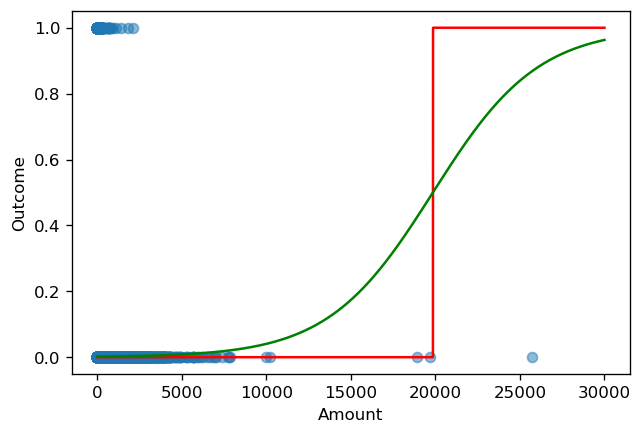

In [122]:
# Question 4 code here

creditcardlr=LogisticRegression(penalty="none",max_iter=10000).fit(Xtrain,ytrain)

fig,ax=plt.subplots(dpi=120)

plt.scatter(x=Xtest,y=ytest,alpha=0.5)
plt.xlabel("Amount")
plt.ylabel("Outcome")

newx = np.linspace(0,30000,30000).reshape(-1,1)
yp=creditcardlr.predict(newx)
ax.plot(newx,yp,color="red")

ypp=creditcardlr.predict_proba(newx)
ax.plot(newx,ypp[:,-1],color="green")


## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** 
1

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** 
One of the instance's predicted probabilities are 0.13291726 and 0.86708274. The classifier predicts that the probability of being positive is 0.86708247, and this probability is higher than threshold (0.5). Therefore, the classifier labeled the instance as positive. 

* Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

**YOUR ANSWER HERE:** 
No. The classifier labels most of data as negative, and it rarely labels data as positive. Then specificity is very high, because most of the class negative data are labeled as negative. However, the classifier labels many positive data as negative. Then the number of true positive is very small, and the number of false negative is large. As a result, precision and recall is very low. Although this classifier can correctly identify actually negative data, it cannot identify actually positive data. We know that acutally positive data are fraudulent transactions, so this classifier is not useful for finding fraudulent transactions.

In [123]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
yhat=creditcardlr.predict(Xtest)
ytest_prob=creditcardlr.predict_proba(Xtest)
compute_performance(yhat,ytest,creditcardlr.classes_)

## Put code here to compute whatever else you might need to answer the question.


case=0
for i in range (len(yhat)):
    if yhat[i]==1:
        case=i
        break
print("one positively-labeled test instance's predicted probabilities are:")
print(creditcardlr.predict_proba(Xtest[case,:].reshape(1,-1)))

tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0
one positively-labeled test instance's predicted probabilities are:
[[0.13291726 0.86708274]]


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `Class`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**YOUR ANSWER HERE:** the parameter for Amount is negative, so smaller amounts are more strongly associated with fraud.


In [124]:
# Code for Question 6
X=creditcard.drop('Class',axis='columns').values
y=creditcard.Class.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

complexcreditcardlr=LogisticRegression(penalty="none",max_iter=10000).fit(Xtrain,ytrain)

print("coefficient of Amount is")
print(complexcreditcardlr.coef_[0][-1])


coefficient of Amount is
-0.006419530747204255


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** 
182

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**YOUR ANSWER:** 
This classifier is better than amount-only classifier. The accuracy and specificity do not change a lot. Recall, precision and sensitivity are increased, so the classifier can identify more fraudulent transctions correctly.


In [125]:
# Code for Question 7
newYhat=complexcreditcardlr.predict(Xtest)
newYtest_prob=complexcreditcardlr.predict_proba(Xtest)
compute_performance(newYhat,ytest,complexcreditcardlr.classes_)


tp: 154 tn: 142133 fp: 28 fn: 89
Accuracy: 0.999 Recall: 0.634 Precision: 0.846 Sensitivity: 0.634 Specificity: 1.0


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** all-variable classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance, because AUROC of all-variable classifier is higher than AUROC of Amount-only classifier(AUROC means that if I randomly generate a positive example and a negative example, what is the probability my classifier put them in the right order).

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** 
In this case, it is likely that classes are imbalanced. Most of the data are from one class. After training, the classifier are more likely to label an instance as the major class(the class that has more data), so it is not random. Not only the classifier cannot distinguish positive and negative instances, but the classifier is also more likely to predict an instance as the major class. As a result, the classifier is worse than random.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.42178603619387894

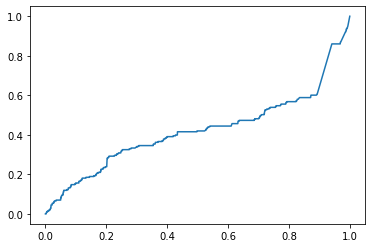

In [126]:
# ROC for Amount-only classifier
fpr,tpr,_=roc_curve(ytest,ytest_prob[:,1],pos_label=1)
ax=sns.lineplot(fpr,tpr)
auc(fpr,tpr)

/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.9265581714675035

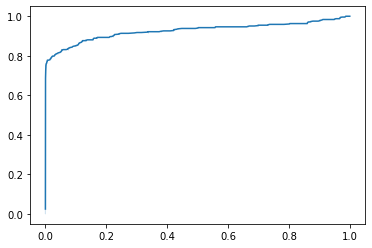

In [127]:
# ROC for all-variable classifier
fpr,tpr,_=roc_curve(ytest,newYtest_prob[:,1],pos_label=1)
ax=sns.lineplot(fpr,tpr)
auc(fpr,tpr)

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**YOUR ANSWER:** 
If we want to recover at least 60% of fraudulent transactions, we want the recall to be at least 60%(recall tells us what proportion fo the positives in the population do i correctly identifty). From the PRC for Amount-only classifier, we can see that precision is close to 0 when recall is 0.6. As a result, when the Amount-only classifier can recover at least 60% of fraudulent transactions, most of the instances, which are labeled positive, are not actually positive. Therefore, Amount-only classifier will have low precision, and this is not ideal. From the PRC for all-variable classifier, we can see that precision is 0.7-0.8 when recall is 0.6. As a result, precision is not very low when the recall is 0.6. Many instances, which are labled positive, are actually positive. This classifier still has a relatively high precision. Then all-variable classifier is preferable if we want to recover at least 60% of fraudulent transactions.

/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


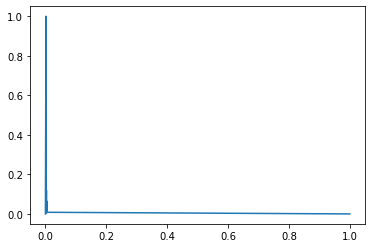

In [128]:
# PRC for Amount-only classifier
precision,recall,_=precision_recall_curve(ytest,ytest_prob[:,1],pos_label=1)
ax=sns.lineplot(precision,recall)


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


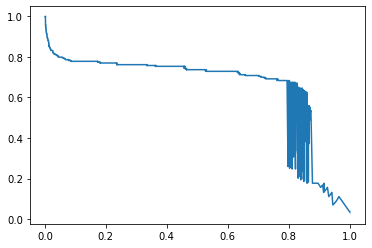

In [129]:
# PRC for all-variable classifier
precision,recall,_=precision_recall_curve(ytest,newYtest_prob[:,1],pos_label=1)
ax=sns.lineplot(precision,recall)